# Figure 1 update

## Initialize

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_style('ticks')
sns.set_context('paper')

from nnn import util, fileio, plotting

from PIL import Image

cm = 1/2.54
px = 1/plt.rcParams['figure.dpi']
tick_font_size = 5
label_font_size = 6

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [2]:
# annotation = pd.read_table('/home/groups/wjg/kyx/array_analysis/data/reference/NNNlib2b_annotation_20220418.tsv')
annotation = pd.read_table('./data/annotation/NNNlib2b_annotation_20220418.tsv')

## Raw images

In [3]:
def get_tile_filename(imagedir, condition, tile):
    found_filename = [fn for fn in os.listdir(os.path.join(imagedir, condition)) if '_tile%d_'%tile in fn]
    assert len(found_filename) == 1, print(found_filename)
    return os.path.join(imagedir, condition, found_filename[0])

def get_cropped_tif(filename, crop_tuple=(1024,1024,256,256)):
    x0, y0, dx, dy = crop_tuple
    im = np.array(Image.open(filename))[x0:x0+dx, y0:y0+dy]
    return im

def normalize_image(img, norm_max_min, celsius):
    fmax, fmin = norm_max_min.loc[celsius, :]
    return (img - fmin) / (fmax - fmin)

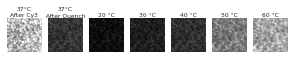

In [5]:
"""
one row
"""
label_font_size = 6
title_args = dict(fontsize=label_font_size, pad=0)
experiment = '20220314'
datadir = '/scratch/groups/wjg/kyx/NNNlib2b_Nov11/data/'
imagedir = os.path.join(datadir, 'images_' + experiment)
condition = ['Green07_Cy3', 'Green09_Quench', 'Green10_20', 'Green14_30', 'Green18_40','Green22_50', 'Green26_60']
T = [37.5, 37.5, 20, 30, 40, 50, 60]
tile = 9

norm_max_min = pd.read_table(os.path.join(datadir, 'series_normalized', 'NNNlib2b_DNA_%s_norm_max_min.tsv'%experiment))
xdata = pd.read_table(os.path.join(datadir, 'series_normalized', 'NNNlib2b_DNA_%s_xdata.txt'%experiment), header=None) - 273.15
norm_max_min.index = np.array(xdata).squeeze()

filenames = [get_tile_filename(imagedir, c, tile) for c in condition]

fig, ax = plt.subplots(1,7,figsize=(3*4.25*cm, 3.5*cm))
for i in range(2):
    im = im = get_cropped_tif(filenames[i], (512, 1024, 128,128))
    norm_im = normalize_image(im, norm_max_min, T[i])
    ax[i].imshow(norm_im, cmap='gray', vmin=300, vmax=2200)
    ax[i].axis('off')
    
ax[0].set_title('37°C\nAfter Cy3', fontsize=label_font_size, pad=0)
ax[1].set_title('37°C\nAfter Quench', fontsize=label_font_size, pad=0)

    
for i in range(5):
    im = im = get_cropped_tif(filenames[i+2], (512, 1024, 128,128))
    norm_im = normalize_image(im, norm_max_min, T[i+2])
    ax[i+2].imshow(norm_im, cmap='gray', vmin=300, vmax=2200)
    ax[i+2].axis('off')
    ax[i+2].set_title('%d °C'%T[i+2], fontsize=label_font_size, pad=0)
    
util.save_fig('./fig/raw_image/all_examples_one_row.pdf')

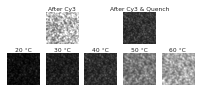

In [44]:
"""
two rows
"""
label_font_size = 6
title_args = dict(fontsize=label_font_size, pad=0)
experiment = '20220314'
datadir = '/scratch/groups/wjg/kyx/NNNlib2b_Nov11/data/'
imagedir = os.path.join(datadir, 'images_' + experiment)
condition = ['Green07_Cy3', 'Green09_Quench', 'Green10_20', 'Green14_30', 'Green18_40','Green22_50', 'Green26_60']
T = [37.5, 37.5, 20, 30, 40, 50, 60]
tile = 9

norm_max_min = pd.read_table(os.path.join(datadir, 'series_normalized', 'NNNlib2b_DNA_%s_norm_max_min.tsv'%experiment))
xdata = pd.read_table(os.path.join(datadir, 'series_normalized', 'NNNlib2b_DNA_%s_xdata.txt'%experiment), header=None) - 273.15
norm_max_min.index = np.array(xdata).squeeze()

filenames = [get_tile_filename(imagedir, c, tile) for c in condition]

fig, ax = plt.subplots(2,5,figsize=(2*4.25*cm, 3.5*cm))
for i in range(2):
    im = im = get_cropped_tif(filenames[i], (512, 1024, 128,128))
    norm_im = normalize_image(im, norm_max_min, T[i])
    ax[0][2*i + 1].imshow(norm_im, cmap='gray', vmin=300, vmax=2200)
    
ax[0][1].set_title('After Cy3', fontsize=label_font_size, pad=0)
ax[0][3].set_title('After Cy3 & Quench', fontsize=label_font_size, pad=0)
    
for i in range(5):
    im = im = get_cropped_tif(filenames[i+2], (512, 1024, 128,128))
    norm_im = normalize_image(im, norm_max_min, T[i+2])
    ax[1][i].imshow(norm_im, cmap='gray', vmin=300, vmax=2200)
    ax[1][i].axis('off')
    ax[0][i].axis('off')
    ax[1][i].set_title('%d °C'%T[i+2], fontsize=label_font_size, pad=0)
    
util.save_fig('./fig/raw_image/all_examples.pdf')

### Some trial and error

In [30]:
datadir = '/scratch/groups/wjg/kyx/NNNlib2b_Nov11/data/'
experiment = '20220314'

imagedir = os.path.join(datadir, 'images_' + experiment)
condition = ['Green10_20', 'Green14_30', 'Green18_40','Green22_50', 'Green26_60']
T = [20, 30, 40, 50, 60]
tile = 9

filenames = [get_tile_filename(imagedir, c, tile) for c in condition]

norm_max_min = pd.read_table(os.path.join(datadir, 'series_normalized', 'NNNlib2b_DNA_%s_norm_max_min.tsv'%experiment))
xdata = pd.read_table(os.path.join(datadir, 'series_normalized', 'NNNlib2b_DNA_%s_xdata.txt'%experiment), header=None) - 273.15
norm_max_min.index = np.array(xdata).squeeze()

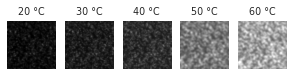

In [103]:
fig, ax = plt.subplots(1,5,figsize=(5,1))
for i in range(5):
    im = im = get_cropped_tif(filenames[i], (512, 1024, 128,128))
    norm_im = normalize_image(im, norm_max_min, T[i])
    ax[i].imshow(norm_im, cmap='gray', vmin=300, vmax=2200)
    ax[i].axis('off')
    ax[i].set_title('%d °C'%T[i])
    
util.save_fig('./fig/raw_image/normalized.pdf')

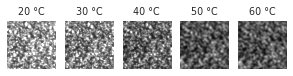

In [104]:
fig, ax = plt.subplots(1,5,figsize=(5,1))
for i in range(5):
    im = im = get_cropped_tif(filenames[i], (512, 1024, 128, 128))
    ax[i].imshow(im, cmap='gray', vmin=200, vmax=500)
    ax[i].axis('off')
    ax[i].set_title('%d °C'%T[i])
    
util.save_fig('./fig/raw_image/unnormalized.pdf')

## Length dependency

In [3]:
def is_polyA(refseq):
    return refseq.count('A') == len(refseq)

def is_polyT(refseq):
    return refseq.count('T') == len(refseq)

In [5]:
os.listdir('./data/series_merged/')

['NNNlib2b_DNA_20211221.pkl']

In [6]:
# datadir = '/scratch/groups/wjg/kyx/NNNlib2b_Nov11/data/'
# r2_series = pd.read_pickle(os.path.join(datadir, 'series_merged/NNNlib2b_DNA_20211216.pkl'))
datadir = './data/'
r2_series = pd.read_pickle(os.path.join(datadir, 'series_merged/NNNlib2b_DNA_20211221.pkl'))

In [21]:
4.25*cm*3

5.019685039370079

/var/folders/_q/8__k6pc13sd827z6scxzrbnc0000gn/T/ipykernel_12036/931399086.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeat_series['polyT'] = repeat_series.RefSeq.apply(is_polyT)
/var/folders/_q/8__k6pc13sd827z6scxzrbnc0000gn/T/ipykernel_12036/931399086.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeat_series['length'] = repeat_series.RefSeq.apply(len)


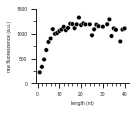

In [10]:
"""
Pooled repeatseries and polyA
"""

repeat_series = r2_series.query('Series == "REPeatControls" | Series == "PolyNTControls"')
repeat_series['polyT'] = repeat_series.RefSeq.apply(is_polyT)
repeat_series = repeat_series[np.logical_not(repeat_series.polyT)]

repeat_series['length'] = repeat_series.RefSeq.apply(len)
length_dep = repeat_series[['length', 'Green20_40.0']].groupby('length').apply(np.nanmean)
length_dep = length_dep#[:20]

fig, ax = plt.subplots(figsize=(4.25*cm, 3.5*cm))
sns.scatterplot(x=length_dep.index, y=length_dep, color='k', size=length_dep.index, sizes=(20,20))
ax.get_legend().remove()
sns.despine(trim=False)
ax.set_xlabel('length (nt)', fontsize=tick_font_size)
ax.set_ylabel('raw fluorescence (a.u.)', fontsize=tick_font_size)
ax.set_ylim(bottom=0, top=1500)

ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(2))
ax.yaxis.set_major_locator(MultipleLocator(500))
ax.yaxis.set_minor_locator(MultipleLocator(250))

plt.xticks(fontsize=tick_font_size)
plt.yticks(fontsize=tick_font_size)

util.save_fig('./fig/length_dependency/length_dependency_repeats_and_polyA.pdf')

### Alternatives

/oak/stanford/groups/wjg/kyx/software/miniconda3/envs/plotting/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


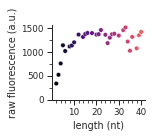

In [26]:
# repeatseries

repeat_series = r2_series.query('Series == "REPeatControls"')
repeat_series['polyT'] = repeat_series.RefSeq.apply(is_polyT)
repeat_series = repeat_series[np.logical_not(repeat_series.polyT)]

repeat_series['length'] = repeat_series.RefSeq.apply(len)
length_dep = repeat_series[['length', 'Green09_Quench']].groupby('length').apply(np.nanmean)
length_dep = length_dep#[:20]
fig, ax = plt.subplots(figsize=(4.25*cm, 3.5*cm))
sns.scatterplot(x=length_dep.index, y=length_dep, hue=length_dep.index, palette='magma', size=length_dep.index, hue_norm=(0,np.max(length_dep.index)*1.5), sizes=(20,20))
ax.get_legend().remove()
sns.despine(trim=False)
ax.set_xlabel('length (nt)')
ax.set_ylabel('raw fluorescence (a.u.)')
ax.set_ylim(bottom=0)

ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(2))
ax.yaxis.set_major_locator(MultipleLocator(500))
ax.yaxis.set_minor_locator(MultipleLocator(250))

util.save_fig('./fig/length_dependency/length_dependency_repeats.pdf')

/oak/stanford/groups/wjg/kyx/software/miniconda3/envs/plotting/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/oak/stanford/groups/wjg/kyx/software/miniconda3/envs/plotting/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/oak/stanford/groups/wjg/kyx/software/miniconda3/envs/plotting/lib/python3.7/site-packages/ipykernel_launch

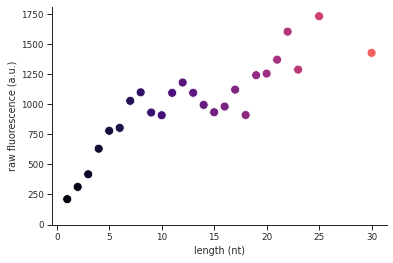

In [272]:
# polyA only
poly_series = r2_series.query('Series == "PolyNTControls"')
poly_series['length'] = poly_series.RefSeq.apply(len)
poly_series['polyA'] = poly_series.RefSeq.apply(is_polyA)
poly_series['polyT'] = poly_series.RefSeq.apply(is_polyT)

length_dep = poly_series.query('polyA')[['length', 'Green22_45.0']].groupby('length').apply(np.nanmean)
length_dep = length_dep#[:13]
fig, ax = plt.subplots()
sns.scatterplot(x=length_dep.index, y=length_dep, hue=length_dep.index, palette='magma', size=length_dep.index, hue_norm=(0,np.max(length_dep.index)*1.5), sizes=(80,80))
ax.get_legend().remove()
sns.despine(trim=False)
ax.set_xlabel('length (nt)')
ax.set_ylabel('raw fluorescence (a.u.)')
ax.set_ylim(bottom=0)

util.save_fig('./fig/length_dependency/length_dependency_polyA.pdf')

## Treemap

In [12]:
import kaleido

import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'jupyterlab'

/Users/yuxi/opt/anaconda3/envs/nnn/lib/python3.8/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/yuxi/opt/anaconda3/envs/nnn/lib/python3.8/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/yuxi/opt/anaconda3/envs/nnn/lib/python3.8/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



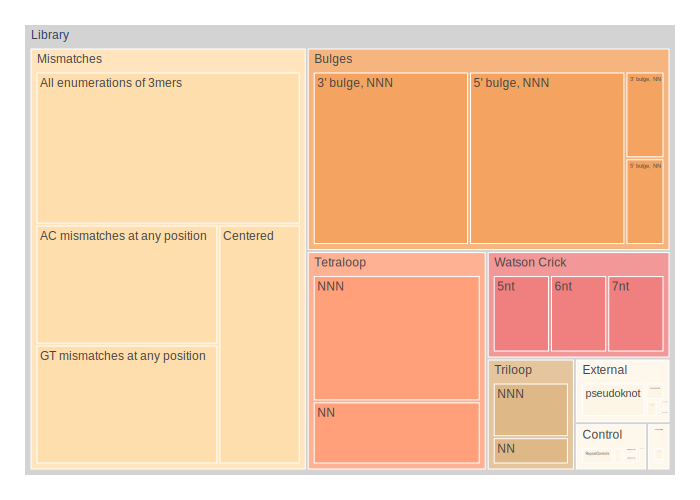

In [24]:
warm_palette = ['#2f4f4f','#228b22','#00ff00','#000080','#1e90ff','#00ffff','#ff8c00','#deb887','#8b4513','#ff0000','#ff69b4','#800080',]
mpl_palette = ["navajowhite", "sandybrown", "lightsalmon", "lightcoral", "burlywood","oldlace", "oldlace", "oldlace"]
df = annotation[['Series', 'ConstructType']]
series_rename_dict = {s: s.title() for s in np.unique(df.Series)}
series_rename_dict["WatsonCrick"] = "Watson Crick"
# series_rename_dict["External"] = "Control"
rename_dict = dict(AC_mismatch_varpos='AC mismatches at any position',
                   GT_mismatch_varpos='GT mismatches at any position',
                   NNN_3primebulge="3' bulge, NNN", NNN_5prime_bulge="5' bulge, NNN",
                   NN_3primebulge="3' bulge, NN", NN_5primebulge="5' bulge, NN",
                   WC_5ntstem='5nt', WC_6ntstem='6nt', WC_7ntstem='7nt',
                   pseudoknot_pt_muts='pseudoknot')
rename_dict['3mer'] = 'All enumerations of 3mers'

df = df.replace({"ConstructType": rename_dict, 'Series': series_rename_dict})

fig = px.treemap(df, path=[px.Constant("Library"), 'Series', 'ConstructType'])
fig.update_traces(root_color="lightgray")
# fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.update_layout(
    font_family = "Arial",
    treemapcolorway = mpl_palette,#warm_palette[6:14],
    margin = dict(t=25, l=25, r=25, b=25)
)
fig.show(renderer="svg")
fig.write_image('./fig/treemap/treemap.svg', engine='kaleido')
# fig.write_html('./fig/treemap/treemap.html')

### Accounting

A bunch of groupby. Manually added to Illustrator.

## Example curves

In [33]:
from nnn.arraydata import ArrayData

replicate_df = pd.read_table('./data/nnnlib2b_replicates.tsv')

arraydata = ArrayData(replicate_df=replicate_df.iloc[:3,:],
                      annotation_file='./data/annotation/NNNlib2b_annotation_20220418.tsv')
revdata = ArrayData(replicate_df=replicate_df.iloc[3,:],
                   annotation_file='./data/annotation/NNNlib2b_annotation_20220418.tsv')
saltdata = ArrayData(replicate_df=replicate_df.iloc[4,:],
                    annotation_file='./data/annotation/NNNlib2b_annotation_20220418.tsv')

86.43% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
86.41% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
80.98% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
81.31% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
31.22% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5


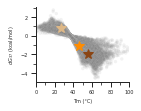

In [26]:
palette=['#2f4f4f','#228b22','#00ff00','#000080','#1e90ff','#00ffff','#ff8c00','#deb887','#8b4513','#ff0000','#ff69b4','#800080',]

example_SEQID_list = ['WC778', 'MMGTP470', 'TRINNN990']
df = arraydata.data

fig, ax = plt.subplots(figsize=(4.25*cm, 3.5*cm))

sns.scatterplot(data=df, x='Tm', y='dG_37', color='gray', size=5, alpha=.1)
for i in range(len(example_SEQID_list)):
    datapoint = df.loc[example_SEQID_list[i],:]
    ax.plot([datapoint['Tm']], [datapoint['dG_37']], marker='*', markersize=10, color=palette[i+6])

# plt.ylim([-100, 0])
plt.xlim([0,100])
sns.despine()
ax.get_legend().remove()

ax.xaxis.set_major_locator(MultipleLocator(20))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_minor_locator(MultipleLocator(1))

plt.xticks(fontsize=tick_font_size)
plt.yticks(fontsize=tick_font_size)

ax.set_xlabel('Tm (°C)', fontsize=tick_font_size)
ax.set_ylabel('$dG_{37}$ (kcal/mol)', fontsize=tick_font_size)

util.save_fig('./fig/example_curves/scatter.pdf')
plt.show()

Load from file /scratch/groups/wjg/kyx/NNNlib2b_Oct6/data/fitted_variant/NNNlib2b_DNA_20211022_v6.CPvariant.gz
86.43% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5


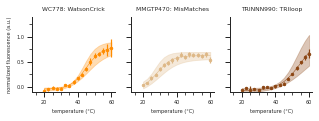

In [90]:
r1 = arraydata.get_replicate_data('r1', attach_annotation=True)

fig, ax = plt.subplots(1,3, figsize=(3*4.25*cm, 3.5*cm), sharey=True)
ax = ax.flatten()

for i in range(len(example_SEQID_list)):
    plotting.plot_actual_and_expected_fit(r1.loc[example_SEQID_list[i],:], ax[i], c=palette[i+6])
    ax[i].set_title(example_SEQID_list[i] + ': ' + r1.loc[example_SEQID_list[i], 'Series'], fontsize=label_font_size)
    
    ax[i].xaxis.set_major_locator(MultipleLocator(20))
    ax[i].xaxis.set_minor_locator(MultipleLocator(5))
    ax[i].yaxis.set_major_locator(MultipleLocator(0.5))
    ax[i].yaxis.set_minor_locator(MultipleLocator(0.25))
    
    sns.despine(trim=False)

    ax[i].tick_params(axis='both', which='major', labelsize=tick_font_size)
    ax[i].set_xlabel('temperature (°C)', fontsize=tick_font_size)
    if i == 0:
        ax[i].set_ylabel('normalized fluorescence (a.u.)', fontsize=tick_font_size)
    
util.save_fig('./fig/example_curves/curves_3.pdf')
plt.show()

Trying to find a series of variants with some logic.

In [52]:
annotation.set_index('SEQID', inplace=True)

In [55]:
annotation.query('Series == "WatsonCrick"').loc['WC779']

Series                                WatsonCrick
ConstructType                          WC_7ntstem
bottomScaffold                                 GC
topScaffold                                    GC
RefSeq                         GTAAACGGAAACGTTTAC
dH_NUPACK                                   -55.5
dS_NUPACK                               -0.158859
Tm_NUPACK                               76.217262
dG_37_ensemble_NUPACK                   -6.410166
TargetStruct                   (((((((....)))))))
dG_37_NUPACK                                -6.23
dG_37_ensemble_150mM_NUPACK             -5.293182
dG_37_ensemble_75mM_NUPACK              -4.842178
Name: WC779, dtype: object

In [54]:
annotation.query('RefSeq=="TAAACGAAAGTTTA"')

,Series,ConstructType,bottomScaffold,topScaffold,RefSeq,dH_NUPACK,dS_NUPACK,Tm_NUPACK,dG_37_ensemble_NUPACK,TargetStruct,dG_37_NUPACK,dG_37_ensemble_150mM_NUPACK,dG_37_ensemble_75mM_NUPACK
SEQID,,,,,,,,,,,,,
WC777,WatsonCrick,WC_5ntstem,NaN,NaN,TAAACGAAAGTTTA,-35.4,-0.105852,61.279181,-3.448599,(((((....))))),-2.57,-2.943421,-2.64731


Load from file ./data/fitted_variant/NNNlib2b_DNA_20211022_v6.CPvariant.gz
86.43% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5


KeyError: 'WC774'

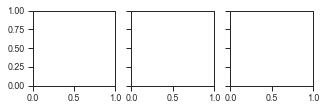

In [71]:
example_SEQID_list = ['WC774', 'WC775', 'WC776']
palette = ['#2f4f4f','#228b22','#00ff00','#000080','#1e90ff','#00ffff','#ff8c00','#deb887','#8b4513','#ff0000','#ff69b4','#800080',]
# rep = 'r2'
# if not 'r1' in globals():
r1 = arraydata.get_replicate_data('r1', attach_annotation=True)

fig, ax = plt.subplots(1,3, figsize=(3*4.25*cm, 3.5*cm), sharey=True)
ax = ax.flatten()

for i in range(len(example_SEQID_list)):
    plotting.plot_actual_and_expected_fit(r1.loc[example_SEQID_list[i],:], ax[i], c=palette[i+6])
    ax[i].set_title(example_SEQID_list[i] + ': ' + r1.loc[example_SEQID_list[i], 'Series'], fontsize=label_font_size)
    
    ax[i].xaxis.set_major_locator(MultipleLocator(20))
    ax[i].xaxis.set_minor_locator(MultipleLocator(5))
    ax[i].yaxis.set_major_locator(MultipleLocator(0.5))
    ax[i].yaxis.set_minor_locator(MultipleLocator(0.25))
    
    sns.despine(trim=False)

    ax[i].tick_params(axis='both', which='major', labelsize=tick_font_size)
    ax[i].set_xlabel('temperature (°C)', fontsize=tick_font_size)
    if i == 0:
        ax[i].set_ylabel('normalized fluorescence (a.u.)', fontsize=tick_font_size)
    
util.save_fig('./fig/example_curves/curves_3.pdf')
plt.show()

## Heating vs Cooling

In [34]:
df = arraydata.data.join(revdata.data, lsuffix='_heating', rsuffix='_cooling')

CPU times: user 6.97 s, sys: 353 ms, total: 7.32 s
Wall time: 5.5 s


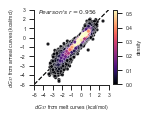

In [48]:
%%time
from scipy.stats import pearsonr

# orange_palette = sns.dark_palette(palette[6], reverse=False, as_cmap=True)

fig, ax = plt.subplots(figsize=(4.25*cm, 3.5*cm))
lim = [-5, 3]
l = lim[1] - lim[0]
df = df.dropna()
pearson, _ = pearsonr(df['dG_37_heating'], df['dG_37_cooling'])
plotting.plot_colored_scatter_comparison(data=df, x='dG_37_heating', y='dG_37_cooling',
                                         palette='magma', lim=lim, alpha=.9, ax=ax)

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))

ax.set_xlabel('$dG_{37}$ from melt curves (kcal/mol)', fontsize=tick_font_size)
ax.set_ylabel('$dG_{37}$ from anneal curves (kcal/mol)', fontsize=tick_font_size)

ax.tick_params(axis='both', which='major', labelsize=tick_font_size)
sns.despine(offset=0)

plt.text(lim[0] + 0.05*l, lim[1] - 0.1*l, r"$Pearson's\ r = %.3f$"%pearson, va='bottom', fontsize=label_font_size)

util.save_fig('./fig/heat_cool/relplot_heat_cool.pdf')


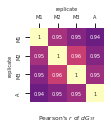

In [29]:
corr_mat = plotting.get_pairwise_pearsonr_matrix([ arraydata.data_all[['dG_37-r1']],
                                                   arraydata.data_all[['dG_37-r2']],
                                                   arraydata.data_all[['dG_37-r3']],
                                                   revdata.data[['dG_37']],
                                                   ])
ticks = ['M1', 'M2', 'M3', 'A']
# mask = np.zeros_like(corr_mat)
# mask[np.tril_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(4.25*cm, 3.5*cm))
im = sns.heatmap(corr_mat, vmin=0.92, vmax=0.99, 
                 cmap='magma', cbar=False, linewidths=0, square=True,
                annot=True, annot_kws={'size': 5})
ax.set_xticklabels(ticks, size=tick_font_size)
ax.set_yticklabels(ticks, size=tick_font_size)
ax.set_xlabel('replicate', size=tick_font_size)
ax.set_ylabel('replicate', size=tick_font_size)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 
ax.set_title("Pearson's $r$ of $dG_{37}$", y=-.3, size=label_font_size)

util.save_fig('./fig/heat_cool/corr_mat.pdf')

## Error binned on paramlabel_font_size

In [150]:
df = arraydata.data.join(annotation.set_index('SEQID'))
df['dG_37_bin'] = pd.qcut(df.dG_37, 5, precision=0)
# df['Tm_bin'] = pd.cut(df.Tm, 5)

major_series = annotation.groupby('Series').apply(len)
major_series = pd.DataFrame(major_series, columns=['Series_size'])
df = df.join(major_series, on='Series')

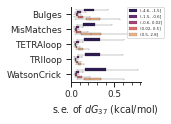

In [158]:
fig, (ax, lax) = plt.subplots(1, 2, figsize=(4.25*cm, 3.5*cm), gridspec_kw={"width_ratios":[5,1]})
# fig, ax = plt.subplots(figsize=(4.25*cm, 3.5*cm))
sns.boxplot(data=df.query("Series_size > 1000"), orient='h', x='dG_37_se', y='Series', hue='dG_37_bin', 
            showfliers = False, palette='magma', linewidth=0.25, ax=ax)

ax.get_legend().remove()
ax.set_ylabel('')
ax.set_xlabel('s.e. of $dG_{37}$ (kcal/mol)')
plt.yticks(fontsize=3)
ax.xaxis.set_minor_locator(MultipleLocator(0.4))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
sns.despine(trim=False)

h,l = ax.get_legend_handles_labels()
lax.legend(h,l, borderaxespad=0, prop={'size': 4})
lax.axis("off")
util.save_fig('./fig/uncertainty_breakdown/dG_se_by_series.pdf')

## Unrelated, checking NUPACK simulation

In [12]:
rc_param = {
    'figure.figsize': (4.25*cm, 3.5*cm),
    'axes.labelsize':tick_font_size,
    'axes.titlesize':label_font_size,
    'xtick.labelsize':tick_font_size,
    'ytick.labelsize':tick_font_size,
    'lines.color': 'k'
    }
sns.set_style('ticks', rc=rc_param)

In [3]:
sim_df = pd.read_pickle('/scratch/groups/wjg/kyx/NNNlib2b_Nov11/data/series_simulated/nupack_75mM.CPseries.pkl')

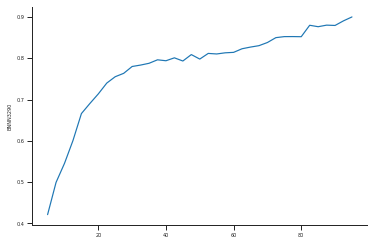

In [15]:
with sns.axes_style('ticks', rc=rc_param):
    sns.lineplot(x=sim_df.columns, y=sim_df.iloc[15,:])
    sns.despine()